In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class RawAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.Wq = nn.Linear(1, 1, bias=False)
        self.Wk = nn.Linear(1, 1, bias=False)
        self.Wv = nn.Linear(1, 1, bias=False)

    def forward(self, x):
        # x shape: (batch, 2)
        x1 = x[:, 0:1]
        x2 = x[:, 1:2]

        tokens = torch.stack([x1, x2], dim=1)  # (batch, 2, 1)

        Q = self.Wq(tokens)
        K = self.Wk(tokens)
        V = self.Wv(tokens)

        scores = torch.matmul(Q, K.transpose(1, 2))  # (batch, 2, 2)
        attended = torch.matmul(scores, V)           # (batch, 2, 1)

        attended = attended.squeeze(-1)               # (batch, 2)

        return attended

class RawAttentionWithTopNeuron(nn.Module):
    def __init__(self):
        super().__init__()
        self.raw_attention = RawAttention() # Instantiate the new RawAttention module
        self.attn_out = nn.Linear(2, 1)   # attention readout. Bias is requried for Nand.

    def forward(self, x):
        # x shape: (batch, 2)

        attended = self.raw_attention(x) # Use the raw_attention module to get attended output

        attn_output = self.attn_out(attended + x) # (batch, 1)

        return attn_output


In [ ]:
torch.manual_seed(0)

# -----------------------------
# Dataset: XOR
# -----------------------------
X = torch.tensor([
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
])

y = torch.tensor([[0.], [1.], [1.], [0.]])

In [ ]:
torch.manual_seed(0)

# -----------------------------
# Dataset: NAND
# -----------------------------
X = torch.tensor([
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
])

y = torch.tensor([[1.], [1.], [1.], [0.]])

In [ ]:
model = RawAttentionWithTopNeuron()


#optimizer = optim.Adam(model.parameters(), lr=0.05)
optimizer = optim.AdamW(model.parameters(), lr=5e-2) #5e-2 is same as .05
#optimizer = torch.optim.SGD(model.parameters(), lr=0.05)


# Tried learning rate 1e-3, but for this problem it is not working.
# Using scheduler below helps, but since it is fluctuating with .00x, may not be worth it.
#scheduler = torch.optim.lr_scheduler.ExponentialLR(
#    optimizer,
#    gamma=0.9995
#)
#optimizer = optim.Adam(model.parameters(), lr=0.05)

loss_fn = nn.MSELoss()
loss_history = []
for epoch in range(8000):
    optimizer.zero_grad()
    preds = model(X)
    loss = loss_fn(preds, y)
    loss_history.append(loss.item()) # Store loss
    loss.backward()
    optimizer.step()
    #scheduler.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, loss = {loss.item():.4f}")


Epoch 0, loss = 0.2378
Epoch 50, loss = 0.0008
Epoch 100, loss = 0.0000
Epoch 150, loss = 0.0000
Epoch 200, loss = 0.0002
Epoch 250, loss = 0.0001
Epoch 300, loss = 0.0000
Epoch 350, loss = 0.0000
Epoch 400, loss = 0.0000
Epoch 450, loss = 0.0000
Epoch 500, loss = 0.0000
Epoch 550, loss = 0.0000
Epoch 600, loss = 0.0004
Epoch 650, loss = 0.0000
Epoch 700, loss = 0.0000
Epoch 750, loss = 0.0000
Epoch 800, loss = 0.0049
Epoch 850, loss = 0.0000
Epoch 900, loss = 0.0000
Epoch 950, loss = 0.0000
Epoch 1000, loss = 0.0000
Epoch 1050, loss = 0.0034
Epoch 1100, loss = 0.0000
Epoch 1150, loss = 0.0000
Epoch 1200, loss = 0.0000
Epoch 1250, loss = 0.0000
Epoch 1300, loss = 0.0000
Epoch 1350, loss = 0.0005
Epoch 1400, loss = 0.0000
Epoch 1450, loss = 0.0000
Epoch 1500, loss = 0.0000
Epoch 1550, loss = 0.0000
Epoch 1600, loss = 0.0000
Epoch 1650, loss = 0.0001
Epoch 1700, loss = 0.0000
Epoch 1750, loss = 0.0000
Epoch 1800, loss = 0.0000
Epoch 1850, loss = 0.0001
Epoch 1900, loss = 0.0000
Epoch 195

In [ ]:
model = RawAttentionWithTopNeuron()
optimizer = torch.optim.LBFGS(
    model.parameters(),
    lr=0.05,
    max_iter=20,
    history_size=100
)

loss_fn = nn.MSELoss()
loss_history = []

for epoch in range(8000):

    def closure():
        optimizer.zero_grad()
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        return loss

    loss = optimizer.step(closure)
    loss_history.append(loss.item())

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, loss = {loss.item():.4f}")


Epoch 0, loss = 0.8595
Epoch 50, loss = 0.0000
Epoch 100, loss = 0.0000
Epoch 150, loss = 0.0000
Epoch 200, loss = 0.0000
Epoch 250, loss = 0.0000
Epoch 300, loss = 0.0000
Epoch 350, loss = 0.0000
Epoch 400, loss = 0.0000
Epoch 450, loss = 0.0000
Epoch 500, loss = 0.0000
Epoch 550, loss = 0.0000
Epoch 600, loss = 0.0000
Epoch 650, loss = 0.0000
Epoch 700, loss = 0.0000
Epoch 750, loss = 0.0000
Epoch 800, loss = 0.0000
Epoch 850, loss = 0.0000
Epoch 900, loss = 0.0000
Epoch 950, loss = 0.0000
Epoch 1000, loss = 0.0000
Epoch 1050, loss = 0.0000
Epoch 1100, loss = 0.0000
Epoch 1150, loss = 0.0000
Epoch 1200, loss = 0.0000
Epoch 1250, loss = 0.0000
Epoch 1300, loss = 0.0000
Epoch 1350, loss = 0.0000
Epoch 1400, loss = 0.0000
Epoch 1450, loss = 0.0000
Epoch 1500, loss = 0.0000
Epoch 1550, loss = 0.0000
Epoch 1600, loss = 0.0000
Epoch 1650, loss = 0.0000
Epoch 1700, loss = 0.0000
Epoch 1750, loss = 0.0000
Epoch 1800, loss = 0.0000
Epoch 1850, loss = 0.0000
Epoch 1900, loss = 0.0000
Epoch 195

In [ ]:
# Apply newton method on the loss function itself as we know Loss should be zero
# multiply and divide as we can't divide by gradient which is vector
model = RawAttentionWithTopNeuron()

loss_fn = nn.MSELoss()
loss_history = []

for epoch in range(800):
    # Zero gradients
    model.zero_grad()

    # Forward
    preds = model(X)
    loss = loss_fn(preds, y)
    loss_history.append(loss.item())

    # Backward
    loss.backward()

    # ---- YOUR UPDATE RULE ----
    with torch.no_grad():
        # Compute ||grad||^2 over ALL parameters
        grad_norm_sq = 0.0
        for p in model.parameters():
            if p.grad is not None:
                grad_norm_sq += torch.sum(p.grad ** 2)

        # Safety check
        if grad_norm_sq < 1e-12:
            print("Gradient vanished — stopping.")
            break

        step_scale = loss / grad_norm_sq

        for p in model.parameters():
            if p.grad is not None:
                p -= step_scale * p.grad
    # --------------------------

    if epoch % 1 == 0:
        print(f"Epoch {epoch}, loss = {loss.item():.6f}")


Epoch 0, loss = 0.359462
Epoch 1, loss = 0.627286
Epoch 2, loss = 0.261429
Epoch 3, loss = 1.599214
Epoch 4, loss = 0.474620
Epoch 5, loss = 0.251162
Epoch 6, loss = 17.851620
Epoch 7, loss = 4.630070
Epoch 8, loss = 1.266378
Epoch 9, loss = 0.437558
Epoch 10, loss = 0.423392
Epoch 11, loss = 0.316797
Epoch 12, loss = 0.515779
Epoch 13, loss = 0.253946
Epoch 14, loss = 4.822937
Epoch 15, loss = 0.599857
Epoch 16, loss = 0.306121
Epoch 17, loss = 1.098067
Epoch 18, loss = 0.284944
Epoch 19, loss = 0.387080
Epoch 20, loss = 0.221181
Epoch 21, loss = 6.139642
Epoch 22, loss = 1.920382
Epoch 23, loss = 0.607648
Epoch 24, loss = 0.231340
Epoch 25, loss = 0.251443
Epoch 26, loss = 0.230193
Epoch 27, loss = 0.213342
Epoch 28, loss = 0.305231
Epoch 29, loss = 0.168376
Epoch 30, loss = 18.206779
Epoch 31, loss = 6.108058
Epoch 32, loss = 2.131467
Epoch 33, loss = 0.908937
Epoch 34, loss = 0.643647
Epoch 35, loss = 0.401129
Epoch 36, loss = 0.331004
Epoch 37, loss = 0.345438
Epoch 38, loss = 0.2

In [ ]:
import numpy as np

losses = np.array(loss_history)
THRESHOLD = 0.0001

# Find first epoch where loss goes below threshold
below_idx = np.where(losses <= THRESHOLD)[0]

if len(below_idx) == 0:
    print("Loss never reached threshold.")
else:
    start = below_idx[0]
    increases = np.where(losses[start+1:] > losses[start:-1])[0]

    if len(increases) == 0:
        print("No loss increases after convergence.")
    else:
        print(f"Loss increased {len(increases)} times after reaching {THRESHOLD}.")
        for i in increases[:10]:  # show first few
            e = start + i + 1
            print(
                f"Epoch {e}: "
                f"{losses[e-1]:.6f} → {losses[e]:.6f}"
            )
    print(f"Loss at last {losses[-1]:.12f}")

Loss increased 199 times after reaching 0.0001.
Epoch 292: 0.000100 → 0.001126
Epoch 295: 0.000110 → 0.000165
Epoch 297: 0.000092 → 0.001679
Epoch 301: 0.000085 → 0.000437
Epoch 304: 0.000082 → 0.000533
Epoch 307: 0.000076 → 0.002289
Epoch 312: 0.000027 → 0.000346
Epoch 315: 0.000032 → 0.000034
Epoch 317: 0.000029 → 0.000040
Epoch 319: 0.000025 → 0.000162
Loss at last 0.000000000004


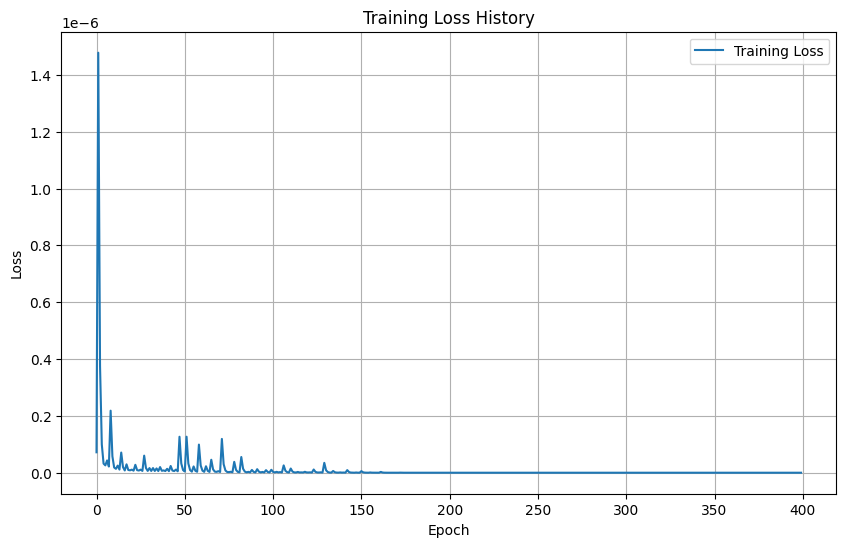

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#plt.plot(loss_history[:1500], label='Training Loss')
plt.plot(loss_history[400:], label='Training Loss')
#plt.plot(loss_history[:500], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Learned Parameters:')
for name, param in model.named_parameters():
    print(f'Parameter: {name}, Value: {param.data}')

Learned Parameters:
Parameter: raw_attention.Wq.weight, Value: tensor([[0.7937]])
Parameter: raw_attention.Wk.weight, Value: tensor([[0.7937]])
Parameter: raw_attention.Wv.weight, Value: tensor([[-0.7937]])
Parameter: attn_out.weight, Value: tensor([[2.0000, 2.0000]])
Parameter: attn_out.bias, Value: tensor([2.2953e-06])


### Numerical Substitution for Gate

Using the learned parameters for the NAND gate:

*   $w_q = 0.6367$
*   $w_k = 1.1251$
*   $w_v = -1.3959$
*   $w_{attn\_out,1} = 0.4634$
*   $w_{attn\_out,2} = 0.5366$
*   $b_{attn\_out} = 1.0000$

First, calculate $C = w_q w_k w_v = (0.6367) \cdot (1.1251) \cdot (-1.3959) \approx -0.9995 \approx -1.0$.

Substituting these values into the simplified formula for binary inputs $(x_1^2 = x_1, x_2^2 = x_2)$:

$output = (w_{attn\_out,1} \cdot x_1 + w_{attn\_out,2} \cdot x_2) \cdot (C \cdot (x_1 + x_2) + 1) + b_{attn\_out}$

becomes:

$output = (0.4634 \cdot x_1 + 0.5366 \cdot x_2) \cdot (-1.0 \cdot (x_1 + x_2) + 1) + 1.0$

In [ ]:
wq = model.raw_attention.Wq.weight.item()
wk = model.raw_attention.Wk.weight.item()
wv = model.raw_attention.Wv.weight.item()
w_attn_out1 = model.attn_out.weight[0,0].item()
w_attn_out2 = model.attn_out.weight[0,1].item()
b_attn_out = model.attn_out.bias[0].item()
#b_attn_out = 0
C = wq * wk * wv

# Calculate coefficients for the fully expanded form for explanation
coeff_x1_term = w_attn_out1 * (C + 1)
coeff_x2_term = w_attn_out2 * (C + 1)
coeff_x1x2_term = C * (w_attn_out1 + w_attn_out2)
print(coeff_x1_term, coeff_x2_term, coeff_x1x2_term, b_attn_out)
print(f"{coeff_x1_term:.4f}, {coeff_x2_term:.4f}, {coeff_x1x2_term:.4f}, {b_attn_out:.4f}")



0.9999964607127574 0.9999964607127574 -1.9999927734597391 2.2953267944103573e-06
1.0000, 1.0000, -2.0000, 0.0000


### Numerical Substitution

Using the learned parameters (for XOR:

*   $w_q = -1.0343$
*   $w_k = -0.7918$
*   $w_v = -0.6119$
*   $w_{attn\_out,1} = 1.9998$
*   $w_{attn\_out,2} = 1.9997$
*   $b_{attn\_out} = -0.0005$

First, calculate $C = w_q w_k w_v = (-1.0343) \cdot (-0.7918) \cdot (-0.6119) \approx -0.5011$.

Substituting these values into the simplified formula:

$output = (1.9998 \cdot x_1 + 1.9997 \cdot x_2) \cdot (-0.5011 \cdot (x_1^2 + x_2^2) + 1) - 0.0005$
